### Домашняя работа

**Задание простого уровня** Мы говорили, что метрики качества нужны, чтобы сравнивать различные модели между собой. В задаче полиномиальной регрессии реализуйте код для выбора лучшей степени полиному:

* возьмите все степени от 1 до 10 по порядку, без пропусков.
* найдите степень полинома, где будет лучший r2-score
* напишите код, который выводит самую подходящую степень полинома и соответствующий ей скор

Эта процедура называется Grid Search и помогает найти лучшие параметры для модели.

Обучите лучшую модель и сделайте predict

Наилучший результат у полинома 10. R^2 равен 0.909


Text(0.5, 1.0, 'График полиномиальной регрессии')

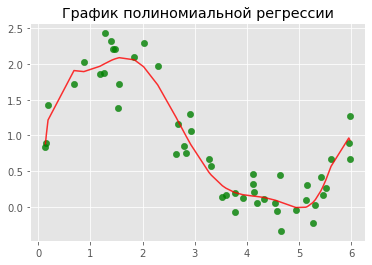

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
import operator

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

plt.style.use('ggplot')

def generate_degrees(source_data: list, degree: int):
    return np.array([source_data**n for n in range(1, degree + 1)]).T

df = pd.read_csv('data.csv')

score = []
y = df['y_train']
x_train = df['x_train']

for i in range(1,11):
    X = generate_degrees(x_train, i)
    regr = LinearRegression()
    regr.fit(X, y)
    y_pred = regr.predict(X)
    r2 = r2_score(y, y_pred)
    score.append({'polynom':i, 'r^2':r2})
    
score.sort(key=operator.itemgetter('r^2'), reverse=True)
print(f"Наилучший результат у полинома {score[0]['polynom']}. R^2 равен {round(score[0]['r^2'], 3)}")

X = generate_degrees(x_train, 10)
regr = LinearRegression().fit(X,y)
y_pred = regr.predict(X)

plt.scatter(x_train, y, 40, 'g', 'o', alpha=0.8)
plt.plot(x_train, y_pred, 'r', alpha=0.8, label='fitted')
plt.title('График полиномиальной регрессии')


**Задание среднего уровня** Напишите класс для обучения модели, который содержит:

* функцию `.fit(X, y)` , которая принимает на вход массив фичей `X`, массив таргетов `y` и обучает коэффициенты регрессии. Код для обучения взять из первого урока модуля *Постановка ML задачи линейной регрессии*
* функцию `.predict(X)`, которая по массиву фичей `X` возвращает массив предсказаний `y`

Нужно использовать код для аналитически вычисляемых коэффициентов. 

Это задание позволит понять, как работает линейная регрессия "внутри" библиотечной реализации.

In [35]:
class LinRegError(Exception):
    def __init__(self, text):
        self.txt = text

class CustomLinearReg:
    def __init__(self):
        self.coef = None
    
    def fit(self, X, y):
        if X.shape[1] == 1:
            X = np.array([list(pair) for pair in zip([1]*len(X), X)])            
        self.coef = inv((X.T).dot(X)).dot(X.T).dot(y) 
    
    def predict(self, X):
        if self.coef is None:
            raise LinRegError('Модель не обучена, примените метод fit()')
        else:
            return self.coef[0] + self.coef[1]*X

In [36]:
regr = CustomLinearReg()
regr.predict(x_train)

LinRegError: Модель не обучена, примените метод fit()

Text(0.5, 1.0, 'График линейной регрессии (собственная реализация). R^2 равен 0.5194693682784115')

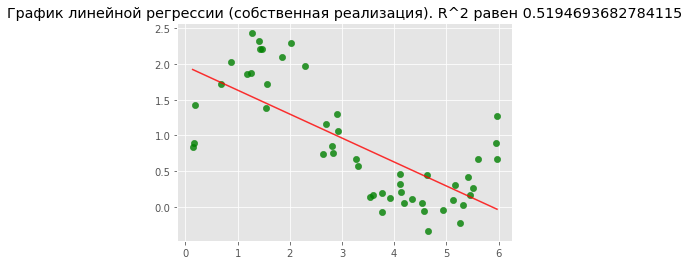

In [37]:
regr.fit(x_train, y)
y_pred = regr.predict(x_train)
r2 = r2_score(y, y_pred)

plt.scatter(x_train, y, 40, 'g', 'o', alpha=0.8)
plt.plot(x_train, y_pred, 'r', alpha=0.8, label='fitted')
plt.title(f'График линейной регрессии (собственная реализация). R^2 равен {r2}')


**Задание высокого уровня**

1. разделите датасет с домами Бостона из Урока 2 (таргет и фичи) на две части: в одной части 80% датасета (назовём train) в другой 20% (назовём valid) с помощью функции `train_test_split` из библиотеки `sklearn`
1. обучите модель только на train датасете
1. постройте предсказания valid датасете
1. Посчитайте  `r2 score` на валидационном сете

После этого примените к обеим датасетам z-преобразование и повторите шаги 2-4. Как изменилась метрика r2?

Это задание поможет понять, как валидировать линейную регрессию (и другие модели) на отложенной выборке.

In [47]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
boston_dataset = load_boston()
df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
df['MEDV'] = boston_dataset.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [57]:
regr = LinearRegression()

X = df.drop('MEDV', axis=1)
y = df['MEDV']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.20, random_state=42)
regr.fit(X_train, y_train)

LinearRegression()

Text(0.5, 1.0, 'Прогноз стоимости жилья. R^2 без Z-преобразования равен 0.67')

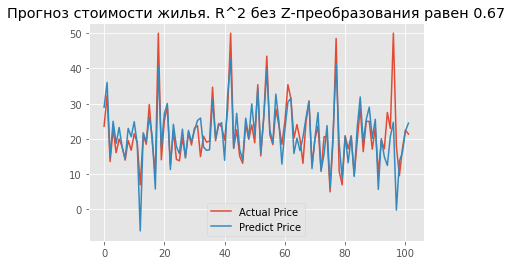

In [66]:
y_pred = regr.predict(X_valid)
r2 = r2_score(y_valid, y_pred)

df_pred = pd.DataFrame(zip(y_valid.values, y_pred), columns= ['Actual Price', 'Predict Price'])
df_pred.plot()
plt.title(f'Прогноз стоимости жилья. R^2 без Z-преобразования равен {round(r2, 2)}')

In [82]:
from sklearn.preprocessing import StandardScaler

regr = LinearRegression()
columns = df.columns

df_scale = df.copy(deep=True)
df_scale = StandardScaler().fit_transform(df_scale)
df_scale = pd.DataFrame(df_scale, columns=columns)

X = df_scale.drop('MEDV', axis=1)
X = StandardScaler().fit_transform(X)
y = StandardScaler().fit_transform(df_scale['MEDV'].values.reshape(-1,1))
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.20, random_state=42)
regr.fit(X_train, y_train)

LinearRegression()

Text(0.5, 1.0, 'Прогноз стоимости жилья. R^2 с Z-преобразованием равен 0.67')

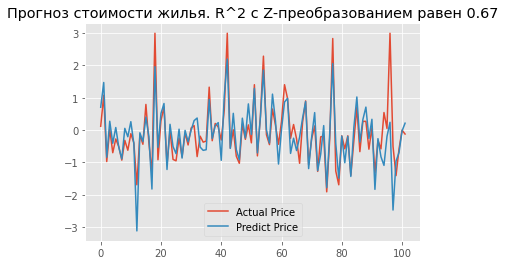

In [83]:
y_pred = regr.predict(X_valid)
r2 = r2_score(y_valid, y_pred)

df_pred = pd.DataFrame(zip(y_valid.ravel(), y_pred.ravel()), columns= ['Actual Price', 'Predict Price'])
df_pred.plot()
plt.title(f'Прогноз стоимости жилья. R^2 с Z-преобразованием равен {round(r2, 2)}')

Точность модели не изменилась